##### Aida Nabila binti Muslimin
##### 52213123419

### 1. Load and Explore Data

Load the provided dataset using Python and import the necessary libraries  (e.g., NumPy, Matplotlib, and Scikit-Learn.)

In [201]:
# Import data structure library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [202]:
# Read raw dataset file into Pandas dataframe
df = pd.read_csv("data/customers.csv")

Explore the dataset briefly to understand its structure.

In [203]:
# Read the first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [204]:
# Read the last 5 rows
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [205]:
# Changing the name of some columns
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})

In [206]:
# Checking the size of the data
df.shape

(200, 5)

In [207]:
# Providing a concise summary of the DataFrame's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [208]:
# Providing summary statistics of the DataFrame
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [209]:
# Checking for null values
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

**Visualize data using Histogram**

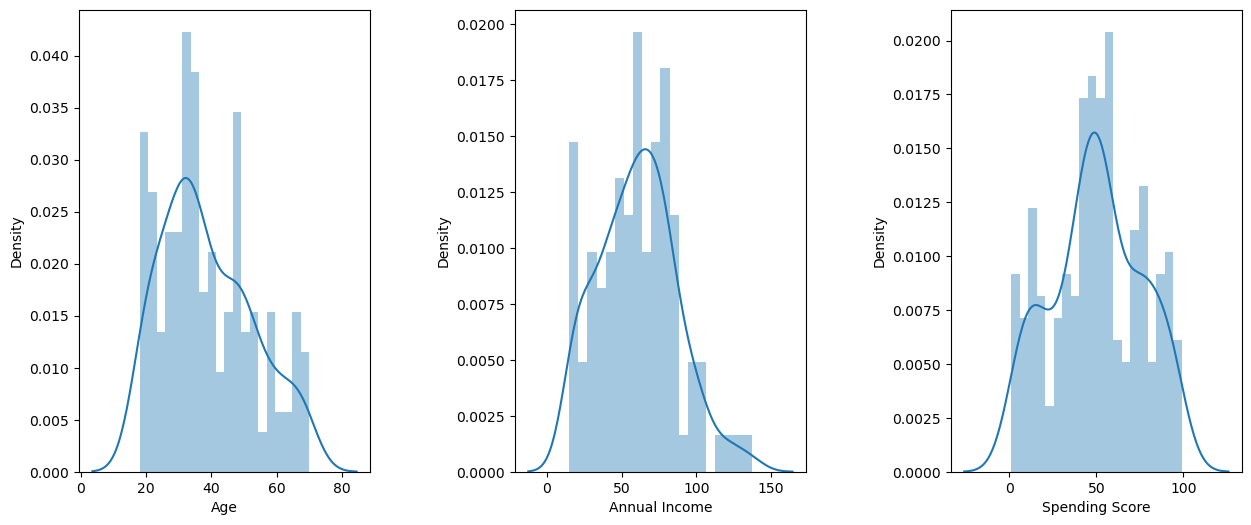

In [210]:
# Density estimation of values using distplot
plt.figure(1, figsize = (15, 6))
n = 0 
for x in ['Age', 'Annual Income', 'Spending Score']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
plt.show()

**Visualize data using Pairplot**

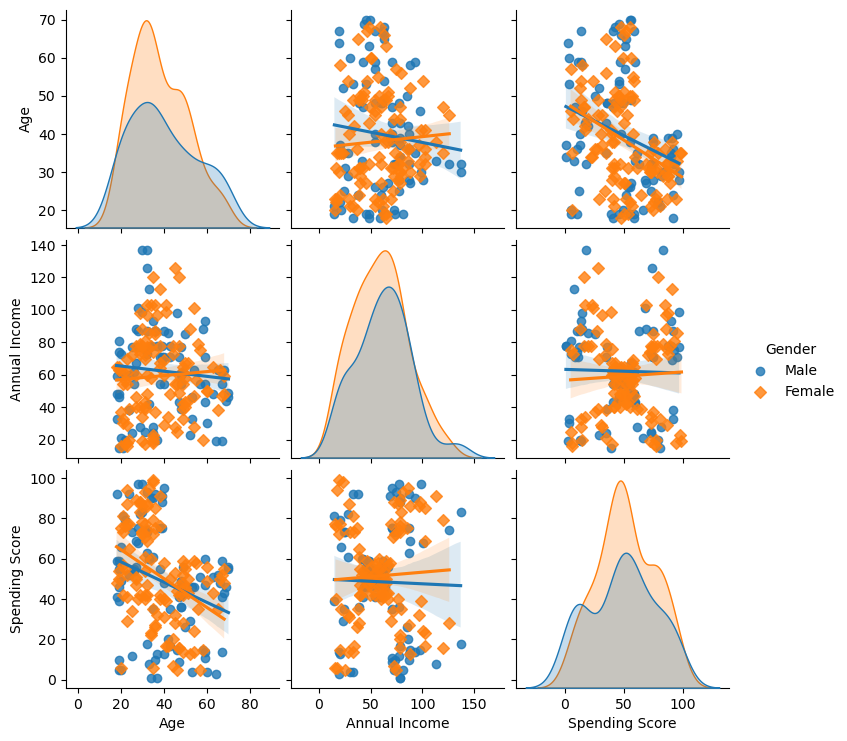

In [211]:
sns.pairplot(df, vars = ['Age', 'Annual Income', 'Spending Score'], kind ="reg", hue = "Gender", markers = ['o','D'])
plt.show()

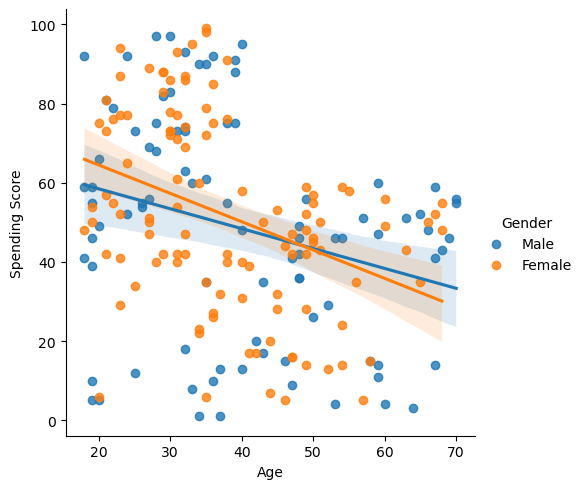

In [212]:
# Age and Spending Score
sns.lmplot(x = "Age", y = "Spending Score", data = df, hue = "Gender")
plt.show()

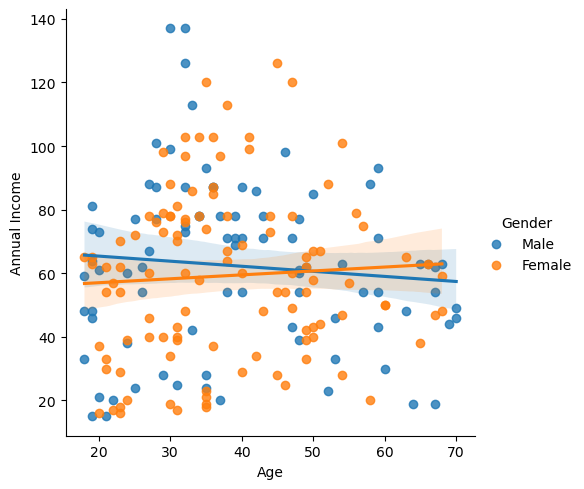

In [213]:
# Age and Annual Income
sns.lmplot(x = "Age", y = "Annual Income", data = df, hue = "Gender")
plt.show()

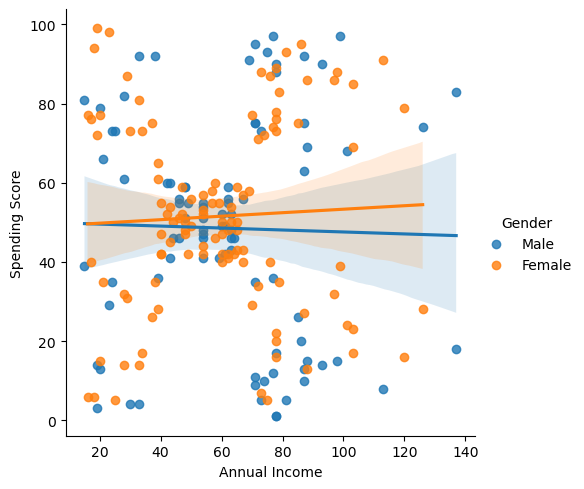

In [214]:
# Annual Income and Spending Score
sns.lmplot(x = "Annual Income", y = "Spending Score", data = df, hue = "Gender")
plt.show()

**Visualize data using Scatter Plot**

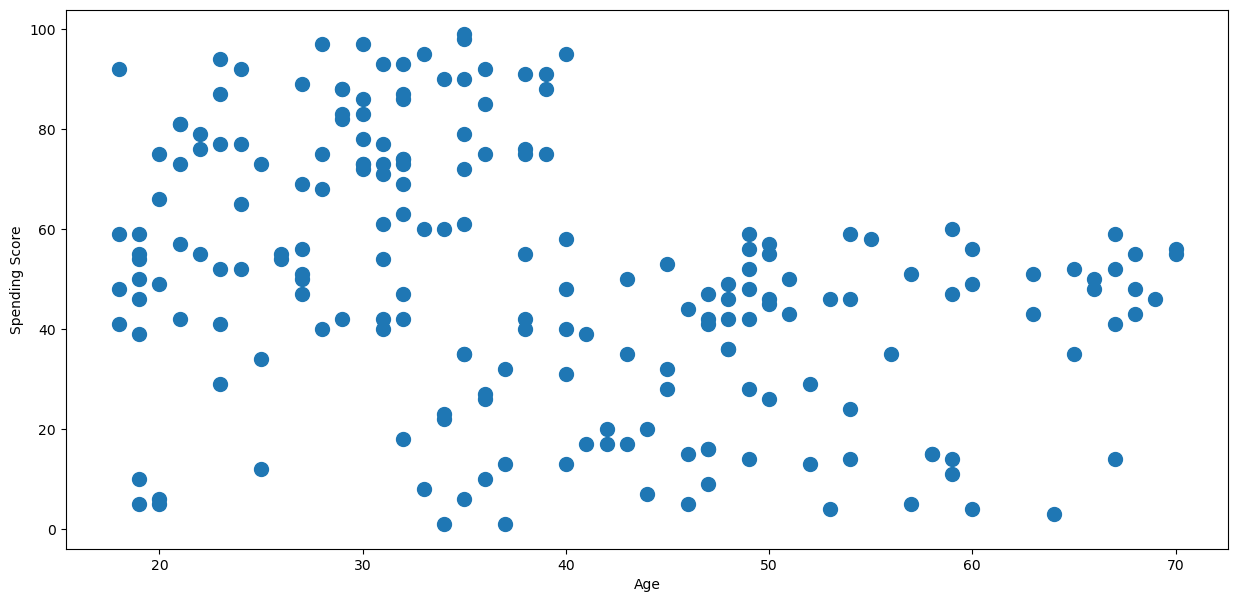

In [215]:
# 2D Clustering based on Age and Spending Score
plt.figure(1 , figsize = (15, 7))
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score', data = df, s = 100)
plt.show()

### 2. Data Processing

 Standardise the dataset if necessary to ensure all features have a similar scale.

In [216]:
from sklearn.preprocessing import StandardScaler 
# Select numerical features for standardization
numerical_features = ['Age', 'Annual Income', 'Spending Score']

# Create a new DataFrame with only numerical features
df_numerical = df[numerical_features]

# Define StandardScaler
scaler = StandardScaler()

# Transform the data
df_standardized = scaler.fit_transform(df_numerical)

# Convert the standardized data back to a DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=numerical_features)

In [217]:
# Display the first few rows of the standardized DataFrame
print(df_standardized.head())

        Age  Annual Income  Spending Score
0 -1.424569      -1.738999       -0.434801
1 -1.281035      -1.738999        1.195704
2 -1.352802      -1.700830       -1.715913
3 -1.137502      -1.700830        1.040418
4 -0.563369      -1.662660       -0.395980


In [218]:
# Display the last few rows of the standardized DataFrame
print(df_standardized.tail())

          Age  Annual Income  Spending Score
195 -0.276302       2.268791        1.118061
196  0.441365       2.497807       -0.861839
197 -0.491602       2.497807        0.923953
198 -0.491602       2.917671       -1.250054
199 -0.635135       2.917671        1.273347


### 3. K-means CLustering

Implement the K-Means clustering algorithm using the K-Means class from Scikit-Learn.

In [219]:
# Deciding the number of clusters to divide the data in using the Elbow Method
X = df[['Age', 'Spending Score']].iloc[:,:].values
inertia = []
for n in range(1, 15):
    algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300,
                        tol = 0.0001, random_state = 111, algorithm = 'lloyd'))
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

Choose an appropriate value for K based on analysis. Provide a brief  justification forther choice.

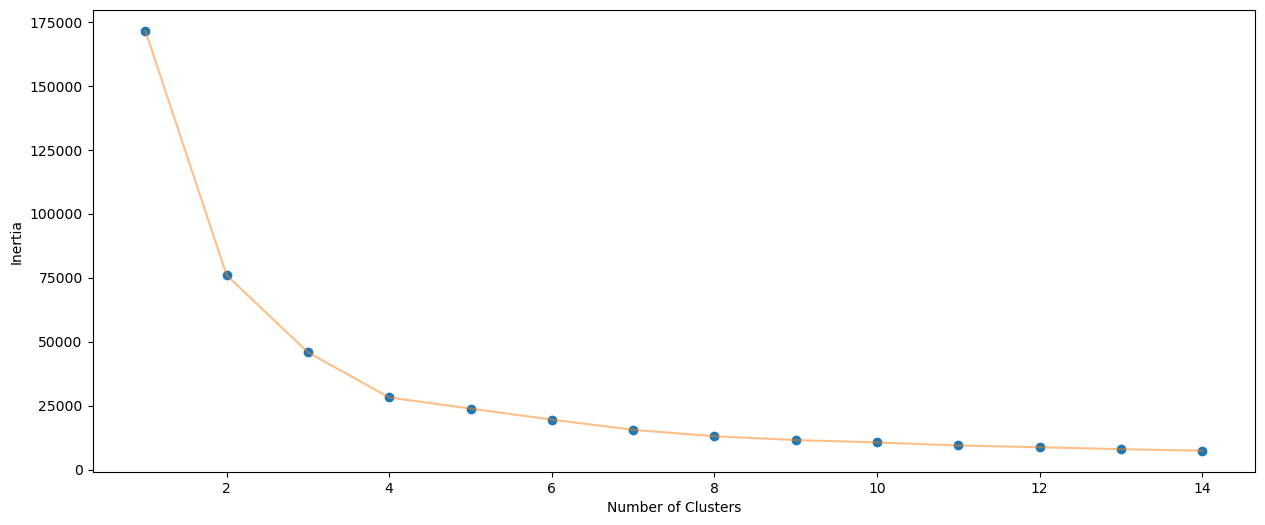

In [220]:
# Plotting the elbow
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1, 15), inertia, 'o')
plt.plot(np.arange(1, 15), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k and one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. In this context, the inertia is used the as cost function, which measures the sum of squared distances of samples to the nearest cluster centre. When visualizing the cost function, the "elbow" point on the graph indicates the optimal number of clusters. To select the value of k at the “elbow”, the point after which the distortion/inertia starts decreasing in a linearly should be identified as it indicates a balance between minimizing intra-cluster variance and avoiding overfiting. The elbow point is a good trade-off between having too few clusters (high variance) and too many clusters (low interpretability).

In this case, if we consider the line in the graph to represent an arm, the elbow point is roughly positioned at k=4. In light of this, 4 is selected as the number of clusters to divide the data in.

In [221]:
# Training K-means with 4 clusters
algorithm = (KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, max_iter = 300, 
                        tol = 0.0001, random_state= 111, algorithm = 'elkan'))
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

### 4. Cluster Visualisation

Visualise the clusters in a 2D scatter plot, using Age on the x-axis and Spend
ing Score on the y-axis. Different clusters are indicated with distinct colours or markers.

In [222]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

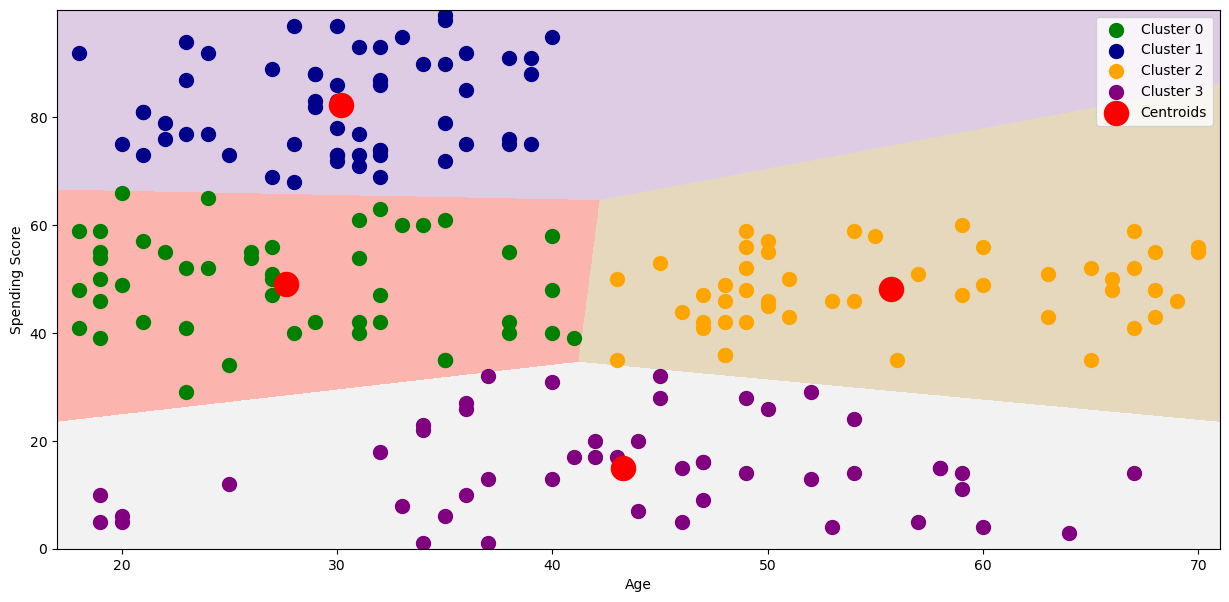

In [223]:
plt.figure(1, figsize=(15, 7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation = 'nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel1, aspect = 'auto', origin = 'lower')

# Define a list of colors for each cluster
cluster_colors = ['green', 'darkblue', 'orange', 'purple']  # Add more colors if needed

# Scatter plot with cluster-specific colors
for cluster_label, color in zip(range(len(cluster_colors)), cluster_colors):
    plt.scatter(x = 'Age', y = 'Spending Score', data = df[labels1 == cluster_label], 
                c = color, s = 100, label = f'Cluster {cluster_label}')

# Plot centroids with a different marker and size
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 1], s = 300, c = 'red', label = 'Centroids')

plt.ylabel('Spending Score')
plt.xlabel('Age')

# Add legend
plt.legend()

plt.show()

### 5. Cluster Analysis

Analyse the results. Discuss the characteristics of each cluster, and provide insights into why the data points were grouped in this manner.

1. <font color='darkblue'><b>Blue</b></font>: The blue cluster groups youner people of age equal to or lesser than 40 with high spending score or high propensity to spend.
2. <font color='green'><b>Green</b></font>: The green cluster groups youner people of age equal to or lesser than 40 with moderate spending score. The people in the green cluster are less likely to spend as much as those in the first or blue cluster but still have some discretionary spending capacity.
3. <font color='orange'><b>Orange</b></font>: The orange cluster groups people of age greater than 40 with moderate spending score.
4. <font color='Purple'><b>Purple</b></font>: The purple cluster groups people of all ages with low spending score. This diverse cluster includes customers of all ages that are at least engaged in terms of spending

The data points were grouped in this manner to divide the population or set of points into a number of groups so that the data points within each group are more comparable to one another and different from the data points within the other groups. By segmenting based on age and spending score, each cluster becomes more homogeneous as members within a cluster are more similar to each other than to members of other clusters, making it easier to make changes for circumstances in which improving customer satisfaction and marketing tactics are the core focuses.  The grouping of data points in this manner is also important to find the correlation between age and spending score due to the significant factor of age in spending behaviour. By analysing the results of clusters in the 2D scatter plot for example, it can be seen that younger individuals tend to have substantially distinc spending patterns compared to elderly people which only exhibit low to moderate spending scores.

### Reference

GeeksforGeeks. (2024, March 11). K means Clustering   Introduction. GeeksforGeeks. https://www.geeksforgeeks.org/k-means-clustering-introduction/

GeeksforGeeks. (2021, December 19). How to standardize data in a Pandas DataFrame? GeeksforGeeks. https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/

Gadigevishalsai. (2022, August 28). Mall Customer Segmentation - Clustering + analysis. Kaggle. https://www.kaggle.com/code/gadigevishalsai/mall-customer-segmentation-clustering-analysis

Heeraldedhia. (2020, October 21). KMEANs clustering for customer data. Kaggle. https://www.kaggle.com/code/heeraldedhia/kmeans-clustering-for-customer-data

Mall Customer segmentation. (2019, September 7). Data UAB. Retrieved May 22, 2024, from https://datauab.github.io/mall_segmentation/

Majumder, P. (2021, May 25). K-Means clustering with Mall Customer Segmentation Data | Full Detailed Code and Explanation. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/05/k-means-clustering-with-mall-customer-segmentation-data-full-detailed-code-and-explanation/